# 2. Feature extraction

In [2]:
# pip install numpy == 2.2.0
# pip install matplotlib
# pip install librosa

import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [3]:
# Path to Binary_Drone_Audio
DATA_DIR = "./data/DroneAudioDataset-master/Binary_Drone_Audio"
LABELS = {"unknown": 0, "yes_drone": 1}

In [4]:
# # Function to extract MFCCs from files
# def extract_mfcc(file_path, n_mfcc = 13, max_len = 130):
#     y, sr = librosa.load(file_path, sr = None)
#     mfcc = librosa.feature.mfcc(y = y, sr = sr, n_mfcc = n_mfcc)

#     if mfcc.shape[1] < max_len:
#         pad_width = max_len - mfcc.shape[1]
#         mfcc = np.pad(mfcc, pad_width = ((0, 0), (0, pad_width)), mode = "constant")
#     else:
#         mfcc = mfcc[:, :max_len]
    
#     return mfcc

# Second version, to skip short audio files
def extract_mfcc(file_path, n_mfcc=13, max_len=100):
    y, sr = librosa.load(file_path, sr=None)
    
    if len(y) < 2048:
        return None  # audio file is too short
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=512, hop_length=256)

    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode="constant")
    else:
        mfcc = mfcc[:, :max_len]

    return mfcc



In [5]:
X = []
y = []

for label_name, label_value in LABELS.items():
    folder_path = os.path.join(DATA_DIR, label_name)
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".wav"):
            file_path = os.path.join(folder_path, file_name)
            mfcc = extract_mfcc(file_path)
            X.append(mfcc)
            y.append(label_value)

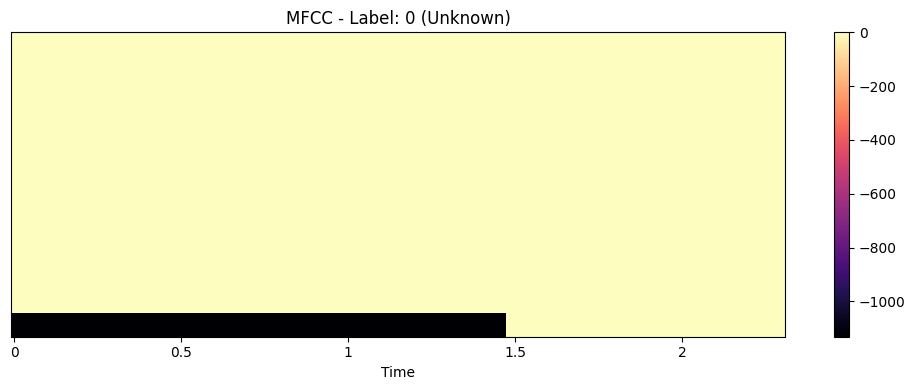

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(X[y.index(0)], x_axis= "time")
plt.colorbar()
plt.title(f'MFCC - Label: 0 (Unknown)')
plt.tight_layout()
plt.show()

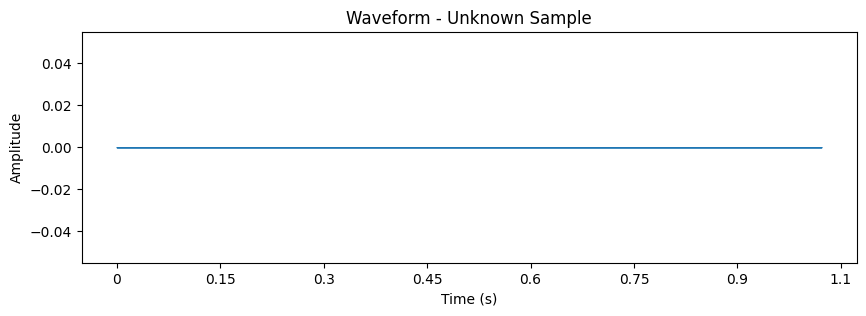

In [7]:
y_audio, sr = librosa.load(os.path.join(DATA_DIR, "unknown", os.listdir(os.path.join(DATA_DIR, "unknown"))[0]), sr=None)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_audio, sr=sr)
plt.title("Waveform - Unknown Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

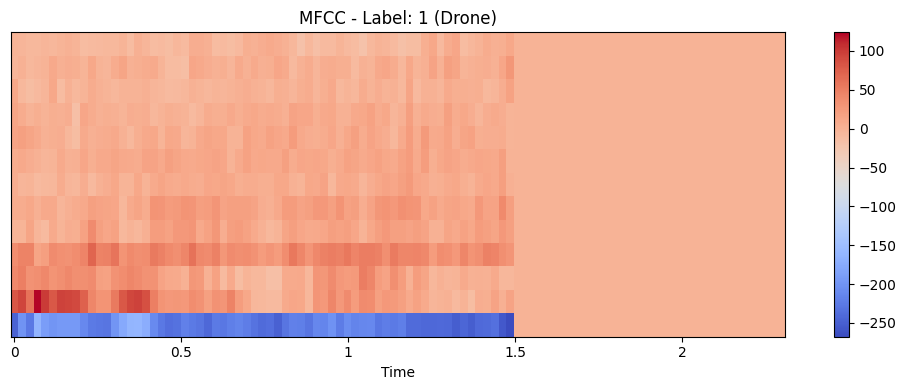

In [8]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(X[y.index(1)], x_axis="time")
plt.colorbar()
plt.title('MFCC - Label: 1 (Drone)')
plt.tight_layout()
plt.show()

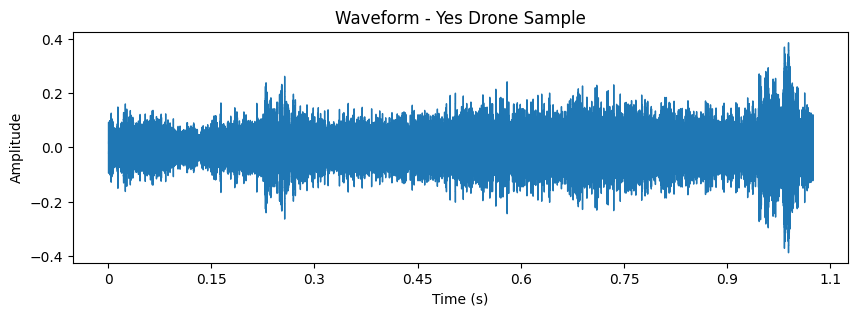

In [9]:
y_audio, sr = librosa.load(os.path.join(DATA_DIR, "yes_drone", os.listdir(os.path.join(DATA_DIR, "yes_drone"))[1]), sr=None)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_audio, sr=sr)
plt.title("Waveform - Yes Drone Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [10]:
print("Label 0 MFCC mean:", np.mean(X[y.index(0)]))
print("Label 1 MFCC mean:", np.mean(X[y.index(1)]))

Label 0 MFCC mean: -55.698265
Label 1 MFCC mean: -3.4832149
